<a href="https://colab.research.google.com/github/ananyabanka/22BDS0154/blob/main/LeafAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LeafAI: Deep Learning–Based Plant Disease Classification using CNN
- Ananya Banka (22BDS0154)

PHASE 1 — SETUP ENVIRONMENT

In [1]:
#Install Dependencies

In [2]:
!pip install tensorflow keras matplotlib seaborn numpy pandas kaggle scikit-learn opencv-python


In [3]:
#Mount Google Drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#Create Project Folder in Drive

In [13]:
from google.colab import drive
drive.flush_and_unmount()


In [14]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [15]:
!mkdir -p /content/drive/MyDrive/LeafAI
!ls /content/drive/MyDrive


'15 june zip.zip'
 AnanyaBanka_22BDS0154_Zluri_App_Catalog_Case_Study.pdf
'Ananya Banka Resume -5.pdf'
'Ananya Banka Resume.gdoc'
'CLASS 11 PHYSICS(VMC) + TESTS'
'Colab Notebooks'
'Copy of Ananya Banka Resume.gdoc'
'Copy of Resource Links.gdoc'
'DE DA1'
'Dr.Uma Chem notes'
'Ericsson shortlist interview.docx'
 LeafAI
 meta-2025-Apr-01-12-21-56
 Pic
'Placement prep checklist.gdoc'
'Product Management Case Study: Employee App Catal....gsheet'
'Project 1 - Ananya Banka (22BDS0154).gdoc'
'rakhi vit.zip'
 SpeechEmotionRecognition
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document.gdoc'
'VMC SAP JEE MAIN TESTS'


In [16]:
!mkdir -p /content/drive/MyDrive/LeafAI


PHASE 2 — CONNECT TO KAGGLE & DOWNLOAD DATASET

In [10]:
#Install Kaggle & Check Version

In [17]:
!pip install kaggle
!kaggle --version


Kaggle API 1.7.4.5


In [12]:
#Upload Your kaggle.json

In [18]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ananyabanka","key":"2369a8d49d8ef1decebf46d35dc42e84"}'}

In [14]:
#Configure Kaggle Credentials

In [19]:
!mkdir -p ~/.kaggle
!mv "kaggle (2).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Nov  7 05:41 .
drwx------ 1 root root 4096 Nov  7 05:41 ..
-rw------- 1 root root   67 Nov  7 05:41 kaggle.json


In [16]:
#Verify Kaggle Login

In [20]:
!kaggle datasets list -s plantvillage | head


ref                                                       title                                              size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
abdallahalidev/plantvillage-dataset                       PlantVillage Dataset                         4371949460  2019-09-01 11:52:26.883000          87310        783  0.875            
emmarex/plantdisease                                      PlantVillage Dataset                          689512690  2018-10-30 01:16:23.440000         126580        957  0.5625           
mohitsingh1804/plantvillage                               PlantVillage                                  857351099  2021-08-20 01:08:58.493000           8590         59  0.625            
soumiknafiul/plantvillage-dataset-labeled                 PlantVi

In [18]:
#Download PlantVillage Dataset

In [21]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:16<00:00, 215MB/s]
100% 2.04G/2.04G [00:16<00:00, 131MB/s]


In [20]:
#Unzip the Dataset

In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage-dataset.zip', 'r')
zip_ref.extractall('/content/PlantVillage')
zip_ref.close()
!ls /content/PlantVillage | head


plantvillage dataset


In [22]:
#Copy Dataset Permanently to Google Drive

In [ ]:
#!cp -r /content/PlantVillage /content/drive/MyDrive/LeafAI/


In [24]:
!ls /content/drive/MyDrive/LeafAI/plantvillage\ dataset | head


color
segmented


In [25]:
data_dir = '/content/drive/MyDrive/LeafAI/plantvillage dataset/color'


In [26]:
!ls "/content/drive/MyDrive/LeafAI/plantvillage dataset/color" | head


Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight


PHASE 3 — LOAD & VERIFY DATASET

In [ ]:
#Explore Dataset Folders

In [27]:
import os

data_dir = '/content/drive/MyDrive/LeafAI/plantvillage dataset/color'

categories = os.listdir(data_dir)
print("Total categories:", len(categories))
print("Sample categories:", categories[:5])


Total categories: 10
Sample categories: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [ ]:
#Count Images per Category

In [28]:
for cls in categories[:10]:
    print(cls, ":", len(os.listdir(os.path.join(data_dir, cls))))


Apple___Apple_scab : 630
Apple___Black_rot : 621
Apple___Cedar_apple_rust : 275
Apple___healthy : 1645
Blueberry___healthy : 1502
Cherry_(including_sour)___Powdery_mildew : 1052
Cherry_(including_sour)___healthy : 854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 513
Corn_(maize)___Common_rust_ : 1192
Corn_(maize)___Northern_Leaf_Blight : 279


PHASE 4 — IMAGE PREPROCESSING

In [ ]:
#Import Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns


In [ ]:
#Create Data Generators

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6854 images belonging to 10 classes.
Found 1709 images belonging to 10 classes.


In [ ]:
#Visualize Sample Images

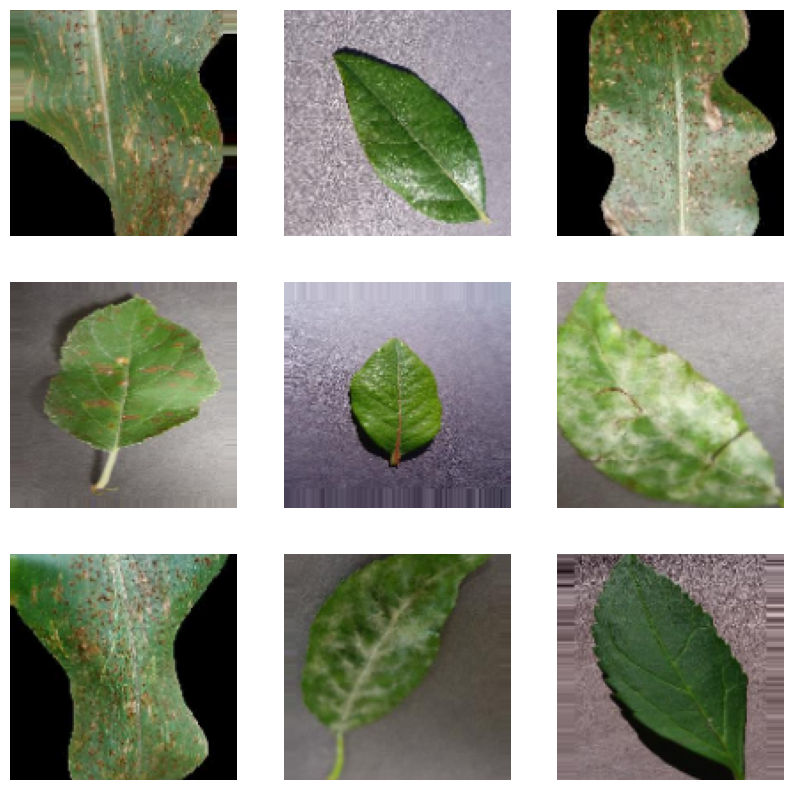

In [31]:
plt.figure(figsize=(10,10))
for i in range(9):
    img, label = next(train_generator)
    plt.subplot(3,3,i+1)
    plt.imshow(img[0])
    plt.axis('off')
plt.show()


PHASE 5 — BUILD CNN MODEL

In [ ]:
#Define CNN Architecture

In [32]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile Model

In [33]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


PHASE 6 — TRAINING & EVALUATION

In [ ]:
#Train the Model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=8,   # was 15
    verbose=1
)


Epoch 1/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.7425 - loss: 0.7864 - val_accuracy: 0.8449 - val_loss: 0.4580
Epoch 2/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.7732 - loss: 0.6314 - val_accuracy: 0.8484 - val_loss: 0.4255
Epoch 3/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.8144 - loss: 0.5486 - val_accuracy: 0.8941 - val_loss: 0.2905
Epoch 4/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.8337 - loss: 0.4696 - val_accuracy: 0.8935 - val_loss: 0.2931
Epoch 5/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.8522 - loss: 0.4095 - val_accuracy: 0.8824 - val_loss: 0.3048
Epoch 6/8
 50/215 ━━━━━━━━━━━━━━━━━━━━ 3:19 1s/step - accuracy: 0.8528 - loss: 0.3820

In [ ]:
#Plot Accuracy & Loss Curves

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [ ]:
#Evaluate Validation Accuracy

In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


PHASE 7 — TESTING & PREDICTION

In [ ]:
#Predict Disease for a Test Image

In [ ]:
!ls "/content/drive/MyDrive/LeafAI/plantvillage dataset/color/Apple___Black_rot" | head


In [ ]:
test_path = '/content/drive/MyDrive/LeafAI/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img(test_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = np.argmax(pred)
label = list(train_generator.class_indices.keys())[predicted_class]

plt.imshow(image.load_img(test_path))
plt.title(f"Predicted: {label}")
plt.axis('off')
plt.show()


PHASE 8 — SAVE & RELOAD MODEL

In [ ]:
#Save Model to Drive

In [ ]:
model.save('/content/drive/MyDrive/LeafAI/leafai_cnn_model.h5')


In [ ]:
model.save('/content/drive/MyDrive/LeafAI/leafai_cnn_model.keras')


In [ ]:
#Reload Saved Model

In [ ]:
from tensorflow.keras.models import load_model
cnn_model = load_model('/content/drive/MyDrive/LeafAI/leafai_cnn_model.h5')


In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cnn_model.evaluate(val_generator)


In [ ]:
from tensorflow.keras.models import load_model

cnn_model = load_model('/content/drive/MyDrive/LeafAI/leafai_cnn_model.h5')
print("Model reloaded successfully (HDF5 format).")


In [ ]:
from keras.saving import load_model

cnn_model = load_model('/content/drive/MyDrive/LeafAI/leafai_cnn_model.keras')
print("Model reloaded successfully (Keras format).")
